In [8]:
import pandas as pd
import matplotlib.pyplot as plt 

In [16]:
df = pd.read_excel('data.xlsx')
vendas = df['vemdas']
dias = df['dias']
df.head()

,dias,vemdas
0,segunda-feira,30
1,terça-feira,28
2,quarta-feira,35
3,quinta-feira,33
4,sexta-feira,50


In [14]:
media_movel = pd.Series(vendas).rolling(window=3).mean()
media_movel


0          NaN
1          NaN
2    31.000000
3    32.000000
4    39.333333
5    47.666667
6    55.000000
Name: vemdas, dtype: float64

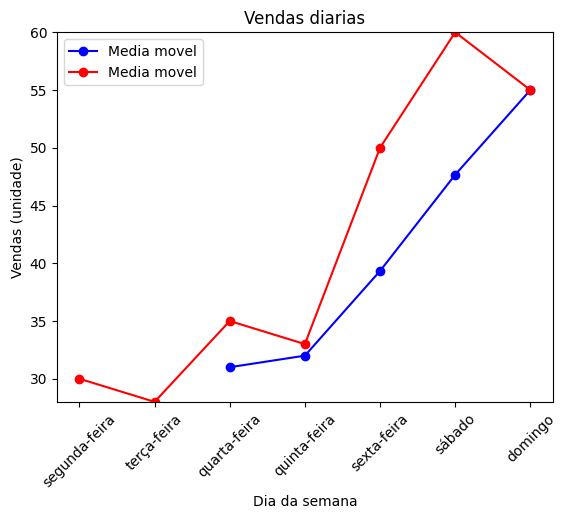

In [22]:
fig, ax = plt.subplots()
ax.plot(media_movel, marker='o', color='blue', label='Media movel' )
ax.plot(vendas, marker='o', color='red', label='Media movel' )
ax.set_xlabel("Dia da semana")
ax.set_ylabel("Vendas (unidade)")
ax.set_title("Vendas diarias")
ax.set_ylim(min(vendas), max(vendas))
ax.set_xticks(range(len(dias)))
ax.set_xticklabels(dias, rotation=45)
ax.legend(loc='upper left', )
plt.show()


# Estacionarias X Não estacionárias

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Fixa a semente de números aleatórios para que os resultados sejam sempre os mesmos
np.random.seed(123)
# Define o "tempo" de 1 a 100
tempo = np.arange(1, 101)

# --- 1. Série Estacionária ---
# Gera 100 números aleatórios de uma distribuição normal
# loc =(média) = 10
# scale = desvio padrão = 2
# size = (quantidade) = 100
estacionaria = np.random.normal(loc=10, scale=2, size=100)
# Calcula a média e o desvio padrão da série
media_est = np.mean(estacionaria)
dp_est = np.std(estacionaria) # Desvio padrão (medida de dispersão)


# --- 2. Série Não Estacionária (com tendência) ---
passos_aleatorios = np.random.normal(loc=0.5, scale=2, size=100)
# soma acumulada ("cumsum") para criar a tendência
nao_estacionaria = np.cumsum(passos_aleatorios)
# Calcula a média e o desvio padrão da nova série
media_nao_est = np.mean(nao_estacionaria)
dp_nao_est = np.std(nao_estacionaria)

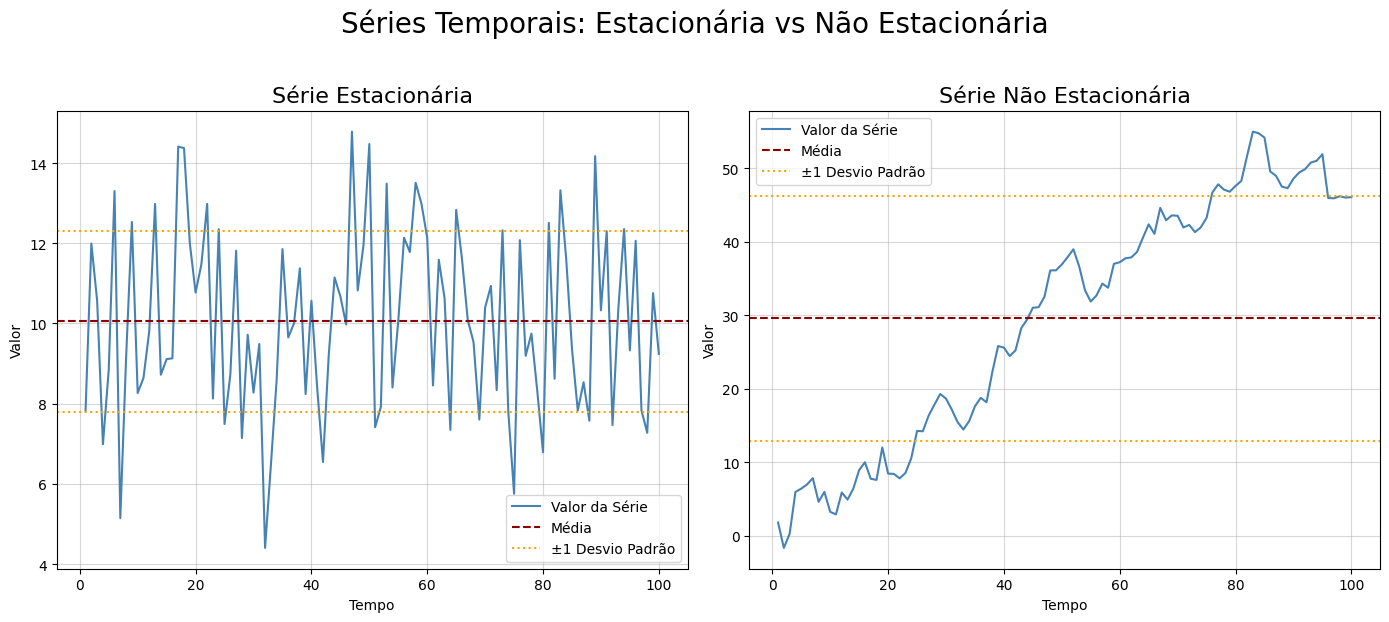

In [24]:
# figura e dois "eixos" (subplots) lado a lado (1 linha, 2 colunas)
# - fig: é a figura inteira (a "janela" do gráfico)
# - (ax1, ax2): são os dois gráficos, um para cada série.
# - figsize: define um bom tamanho para a figura
# sharey permite que o eixo Y de cada gráfico tenha sua própria escala.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=False) # --- Gráfico 1: Estacionária (no eixo ax1) ---
ax1.plot(tempo, estacionaria, color="steelblue", label="Valor da Série")
ax1.set_title("Série Estacionária", fontsize=16)
ax1.set_xlabel("Tempo")
ax1.set_ylabel("Valor")
# Adiciona as linhas de média e desvio padrão
ax1.axhline(media_est, color="darkred", linestyle="--", label="Média")
ax1.axhline(media_est + dp_est, color="orange", linestyle=":", label="±1 Desvio Padrão")
ax1.axhline(media_est - dp_est, color="orange", linestyle=":")
ax1.legend() # Mostra a legenda
ax1.grid(True, alpha=0.5) # Adiciona uma grade suave
# --- Gráfico 2: Não Estacionária (no eixo ax2) ---
ax2.plot(tempo, nao_estacionaria, color="steelblue", label="Valor da Série")
ax2.set_title("Série Não Estacionária", fontsize=16)
ax2.set_xlabel("Tempo")
ax2.set_ylabel("Valor")
# linhas de média e desvio padrão
ax2.axhline(media_nao_est, color="darkred", linestyle="--", label="Média")
ax2.axhline(media_nao_est + dp_nao_est, color="orange", linestyle=":", label="±1 Desvio Padrão")
ax2.axhline(media_nao_est - dp_nao_est, color="orange", linestyle=":")
ax2.legend()
ax2.grid(True, alpha=0.5)
fig.suptitle("Séries Temporais: Estacionária vs Não Estacionária", fontsize=20, y=1.03)
plt.tight_layout()
plt.show()

In [2]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import pandas as pd

# Adicione cache=True
airquality_df = sm.datasets.get_rdataset("airquality", "datasets", cache=True).data
dados = airquality_df.dropna()

plot_acf(dados['Ozone'], title="ACF de Ozonio")
plt.show()

HTTPError: HTTP Error 429: Too Many Requests

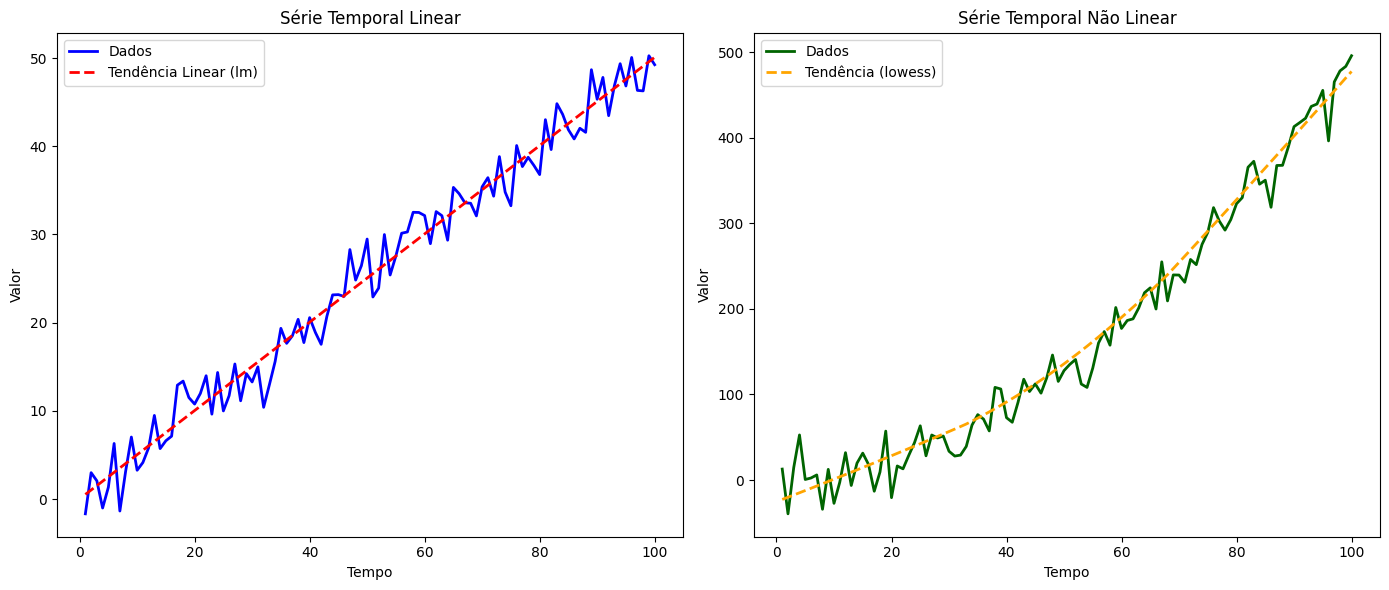

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from statsmodels.nonparametric.smoothers_lowess import lowess

# --- 1. Configuração e Criação dos Dados ---
np.random.seed(123)
# Período de tempo (tempo <- 1:100)
tempo = np.arange(1, 101)

# Série linear: y = a*t + erro (rnorm)
erro_linear = np.random.normal(loc=0, scale=2, size=100)
serie_linear = 0.5 * tempo + erro_linear

# Série não linear: y = a*t^2 + erro
erro_nao_linear = np.random.normal(loc=0, scale=20, size=100)
serie_nao_linear = 0.05 * (tempo**2) + erro_nao_linear

# --- 2. Criar os gráficos lado a lado ---
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# --- 3. Gráfico da série linear (no eixo ax1) ---
# Plot da série (type="l" é o padrão, col="blue" é color="blue")
ax1.plot(tempo, serie_linear, color="blue", linewidth=2, label="Dados")
ax1.set_title("Série Temporal Linear") # main=
ax1.set_xlabel("Tempo") # xlab=
ax1.set_ylabel("Valor") # ylab=
# Adicionar a Regressão linear
slope, intercept, r_value, p_value, std_err = linregress(tempo, serie_linear)
# 2. Criamos os valores Y da linha de regressão (y = a*x + b)
linha_regressao = slope * tempo + intercept
ax1.plot(tempo, linha_regressao, color="red", linestyle="--", linewidth=2, label="Tendência Linear (lm)")
ax1.legend()

# --- 4. Gráfico da série não linear (no eixo ax2) ---
ax2.plot(tempo, serie_nao_linear, color="darkgreen", linewidth=2, label="Dados")
ax2.set_title("Série Temporal Não Linear")
ax2.set_xlabel("Tempo")
ax2.set_ylabel("Valor")
# Adicionar a Suavização local (lines(lowess(...)))
# 1. Calculamos a suavização lowess
suavizacao = lowess(serie_nao_linear, tempo)
# 2. 'suavizacao' é um array com 2 colunas (x, y). a coluna 0 (x) e a coluna 1 (y) para plotar
ax2.plot(suavizacao[:, 0], suavizacao[:, 1], color="orange", linestyle="--", linewidth=2, label="Tendência (lowess)")
ax2.legend()

plt.tight_layout()
plt.show()